In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
const = np.fromfile("const.coordinates.forprinting.binary",dtype=np.float32).reshape(-1,6)

In [3]:
const.shape

(1332, 6)

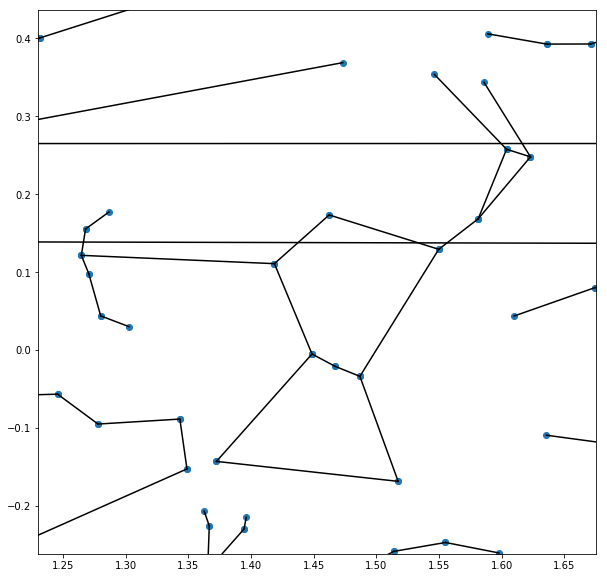

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim([4.7/12.*np.pi,6.4/12.*np.pi])
ax.set_ylim([-15./180.*np.pi,25./180.*np.pi])
#ax.set_ylim([0,1])
norm = np.sqrt(const[:,1]**2+const[:,2]**2+const[:,3]**2)
ax.scatter(const[:,0],const[:,1])
for i in range(len(const[:,1])//2):
    ax.plot([const[2*i,0],const[2*i+1,0]],[const[2*i,1],const[2*i+1,1]], color='black')

In [5]:
#xlim = [4.7/12.*np.pi,6.4/12.*np.pi]
#ylim = [-15./180.*np.pi,25./180.*np.pi]
xlim = [1.35,1.56]
ylim = [-0.2,0.2]
xlim2 = [1.25,1.42]
ylim2 = [0.0,0.2]
xlim3 = [1.53,1.63]
ylim3 = [0.1,0.37]



xyz = []
for i in range(0,len(const[:,1]),2):
    st = const[i]
    stp = const[i+1]
    did = False
    if st[0]>xlim[0] and st[0]<xlim[1]:
        if st[1]>ylim[0] and st[1]<ylim[1]:
            if stp[0]>xlim[0] and stp[0]<xlim[1]:
                if stp[1]>ylim[0] and stp[1]<ylim[1]:
                    xyz.append([st[3],st[4],st[5]])
                    xyz.append([stp[3],stp[4],stp[5]])
                    did = True
    
    if did == False:
        if st[0]>xlim3[0] and st[0]<xlim3[1]:
            if st[1]>ylim3[0] and st[1]<ylim3[1]:
                if stp[0]>xlim3[0] and stp[0]<xlim3[1]:
                    if stp[1]>ylim3[0] and stp[1]<ylim3[1]:
                        xyz.append([st[3],st[4],st[5]])
                        xyz.append([stp[3],stp[4],stp[5]])
                        did = True
    did = True # skip
    if did == False:
        if st[0]>xlim2[0] and st[0]<xlim2[1]:
            if st[1]>ylim2[0] and st[1]<ylim2[1]:
                if stp[0]>xlim2[0] and stp[0]<xlim2[1]:
                    if stp[1]>ylim2[0] and stp[1]<ylim2[1]:
                        xyz.append([st[3],st[4],st[5]])
                        xyz.append([stp[3],stp[4],stp[5]])
                        did = True
xyz = np.array(xyz)

In [6]:
v = np.mean(xyz,axis=0)
v = v/np.linalg.norm(v)
v

array([ 0.3592602 , -0.90515125, -0.22722974], dtype=float32)

In [7]:
def R_2vect(R, vector_orig, vector_fin):
    # Convert the vectors to unit vectors.
    norm = np.linalg.norm
    vector_orig = vector_orig / norm(vector_orig)
    vector_fin = vector_fin / norm(vector_fin)

    # The rotation axis (normalised).
    axis = np.cross(vector_orig, vector_fin)
    axis_len = norm(axis)
    if axis_len != 0.0:
        axis = axis / axis_len

    # Alias the axis coordinates.
    x = axis[0]
    y = axis[1]
    z = axis[2]

    # The rotation angle.
    angle = np.arccos(np.dot(vector_orig, vector_fin))

    # Trig functions (only need to do this maths once!).
    ca = np.cos(angle)
    sa = np.sin(angle)

    # Calculate the rotation matrix elements.
    R[0,0] = 1.0 + (1.0 - ca)*(x**2 - 1.0)
    R[0,1] = -z*sa + (1.0 - ca)*x*y
    R[0,2] = y*sa + (1.0 - ca)*x*z
    R[1,0] = z*sa+(1.0 - ca)*x*y
    R[1,1] = 1.0 + (1.0 - ca)*(y**2 - 1.0)
    R[1,2] = -x*sa+(1.0 - ca)*y*z
    R[2,0] = -y*sa+(1.0 - ca)*x*z
    R[2,1] = x*sa+(1.0 - ca)*y*z
    R[2,2] = 1.0 + (1.0 - ca)*(z**2 - 1.0)


In [8]:
mat = np.zeros((3,3))
R_2vect(mat,v,np.array([0,0,1]))

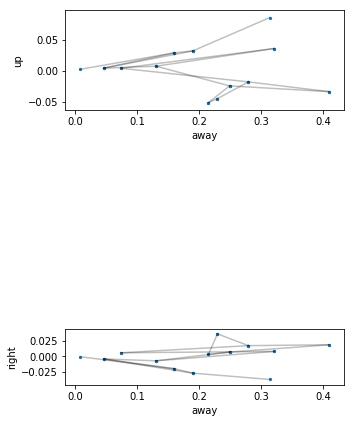

In [9]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
xyzr = xyz.copy()
for i in range(len(xyzr[:,1])):
    r=np.dot(mat,xyz[i])
    xyzr[i] = [-r[1],-r[0],r[2]]
    
ax.set_ylabel("up")
ax.set_xlabel("away")
ax.set_aspect("equal")
ax.scatter(xyzr[:,2],xyzr[:,1],s=5);
for i in range(len(xyzr[:,1])//2):
    ax.plot([xyzr[2*i,2],xyzr[2*i+1,2]],[xyzr[2*i,1],xyzr[2*i+1,1]], color='black',alpha=0.25)
    
ax = fig.add_subplot(212)
ax.set_ylabel("right")
ax.set_aspect("equal")
ax.set_xlabel("away")
ax.scatter(xyzr[:,2],xyzr[:,0],s=5);
for i in range(len(xyzr[:,1])//2):
    ax.plot([xyzr[2*i,2],xyzr[2*i+1,2]],[xyzr[2*i,0],xyzr[2*i+1,0]], color='black',alpha=0.25)


    

In [10]:
(np.max(xyzr,axis=0)-np.min(xyzr,axis=0))/(np.max(xyzr,axis=0)-np.min(xyzr,axis=0))[0]*13

array([13.      , 24.285776, 70.97363 ], dtype=float32)